# `nb04`: Latent variable models

<img src="./figures/nb06/lvm.png" width="40%" />

Latent variable models (LVMs) are a class of models that are used to describe the relationship between a set of observed variables and a set of latent variables. They are used in many scientific fields to describe a data generating process and its observations. Many of the models we will discuss in this course are LVMs. In this notebook, we will showcase some of the most common LVMs.

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Mixed membership model (LDA)

<img src="./figures/nb06/lda.png" width="60%" /> 

(Reproduced from [Blei, 2011](https://www.eecis.udel.edu/~shatkay/Course/papers/UIntrotoTopicModelsBlei2011-5.pdf).)

- Each topic is a distribution over words
- Each document is a mixture of corpus-wide topics
- Each word is drawn from one of those topics

In [32]:
# Parameters
np.random.seed(777)
alpha = 1.0   # proportion of topics in a document
beta = 1.0    # proportion of words in a topic

K = 3  # number of topics
V = 30 # number of words in the vocabulary
M = 10  # number of documents
N = 100 # number of words in a document

# Latent variables
theta_m = np.random.dirichlet([alpha]*K, M)  # proportion of topics in a document
phi_k = np.random.dirichlet([beta]*V, K)     # proportion of words in a topic
z_mn = np.array([[np.random.choice(K, p=theta_m[m]) for n in range(N)] for m in range(M)]) # topic of a word

# Observations
w_mn = np.array([[np.random.choice(V, p=phi_k[z_mn[m, n]]) for n in range(N)] for m in range(M)])


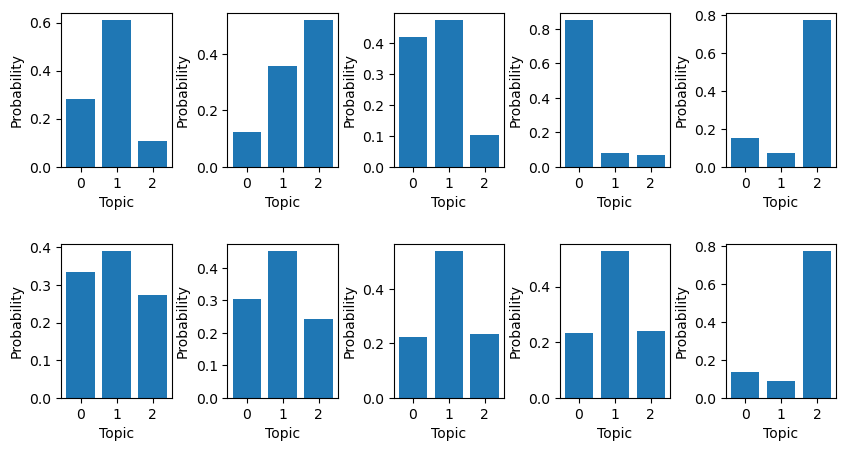

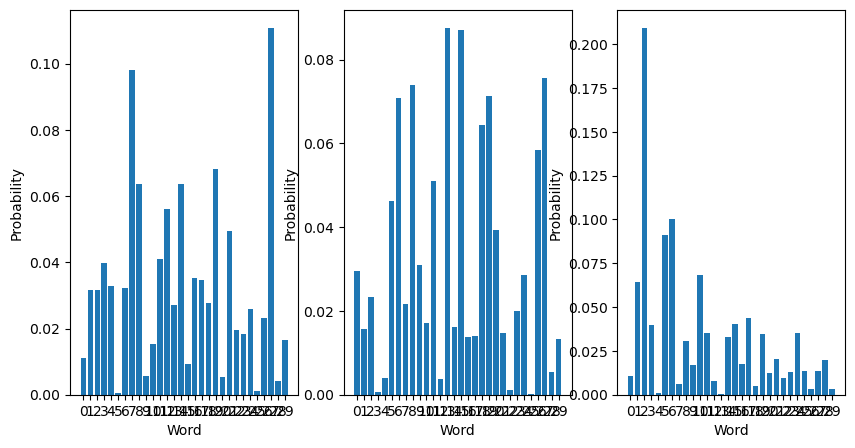

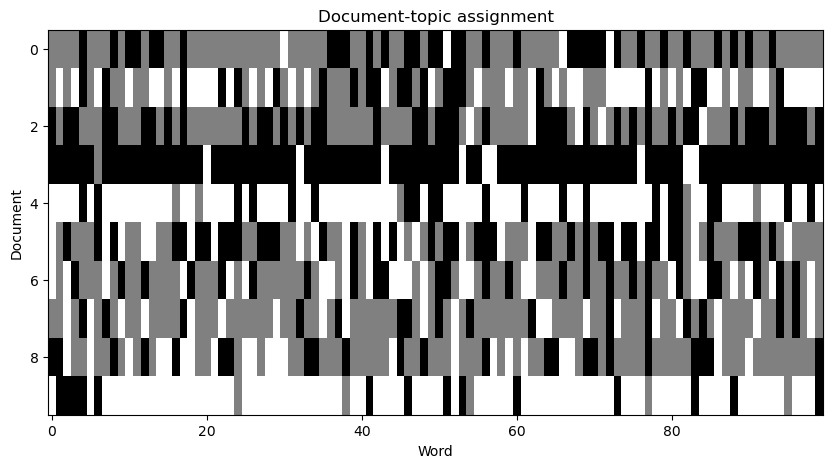

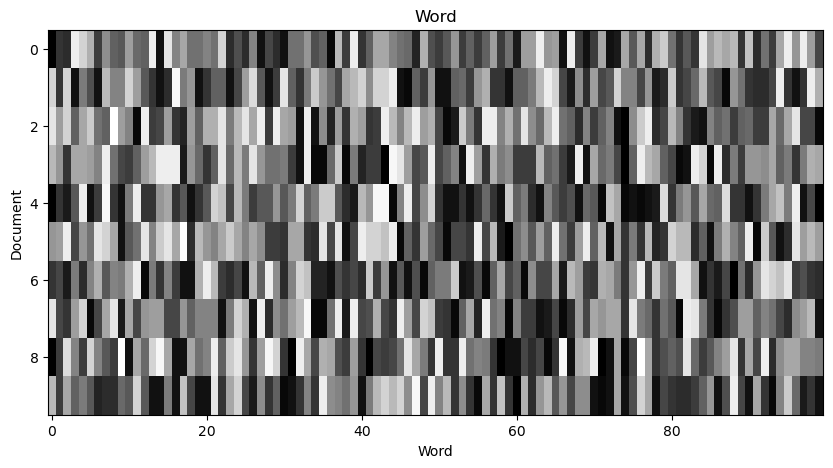

In [33]:
# Plot
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for m in range(M):
    plt.subplot(2, 5, m+1)
    plt.bar(range(K), theta_m[m], tick_label=range(K))
    plt.xlabel('Topic')
    plt.ylabel('Probability')

plt.show()

plt.figure(figsize=(10, 5))

for k in range(K):
    plt.subplot(1, 3, k+1)
    plt.bar(range(V), phi_k[k], tick_label=range(V))
    plt.xlabel('Word')
    plt.ylabel('Probability')

plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(z_mn, cmap='gray', aspect='auto')
plt.title('Document-topic assignment')
plt.xlabel('Word')
plt.ylabel('Document')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(w_mn, cmap='gray', aspect='auto')
plt.title('Word')
plt.xlabel('Word')
plt.ylabel('Document')
plt.show()

<img src="./figures/nb06/lda-results.png" width="60%" /> 